In [26]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## PageRank Algorithm

In [27]:
def PageRank(transition_matrix, d, max_iterations, conv_thres):
    '''
    Arguments:
    transition_matrix: a matrix or numpy array representing the probabilities of going from one page to another
    d: damping factor
    max_iterations: number of iterations
    conv_thres: convergence threshold
    
    Return: ranks of each webpage, as columns of the transition matrix
    '''
    #total number of web pages
    N = transition_matrix.shape[0]
    
    #Intializing the transition matrix with equal probabilities
    PR = np.ones(N)/N
    
    for _ in range(max_iterations):
        PR_new = (1-d)/N + d*np.matmul(transition_matrix,PR)
        
        #normalizing the rank scores
        PR_norm = np.linalg.norm(PR_new - PR, 1)
        
        #covergence constraint
        if PR_norm <= conv_thres:
            return PR_new
        
        PR = PR_new
    
    return PR  

In [28]:
transition_matrix = np.array([
        [0.1,0.5,0.4],
        [0.2,0,0.2],
        [0,0.3,0.3]
    ])
    
d = 0.85
max_iterations = 1000
conv_thres = 1e-6
    
PR = PageRank(transition_matrix, d, max_iterations, conv_thres)
print(f'PageRanks:{PR}')

PageRanks:[0.13229083 0.08908247 0.09760554]


### Visualizing the Markov Chain for web pages

In [29]:
def markov_chain(transition_matrix):
    # Create a directed graph.
    G = nx.DiGraph()

    # Nodes represent pages. Assume node labels are 0, 1, 2, ... for simplicity.
    num_nodes = transition_matrix.shape[0]
    G.add_nodes_from(range(num_nodes))

    # Iterate through the transition matrix to create edges.
    for i in range(num_nodes):
        for j in range(num_nodes):
            if transition_matrix[i, j] > 0:  # Add edge if there's a non-zero transition probability.
                G.add_edge(i, j, weight=transition_matrix[i, j])

    # Visualize the graph.
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)})
    nx.draw_networkx_edges(G, pos)

    plt.title("Markov Chain from Transition Matrix")
    plt.axis("off")
    plt.show()

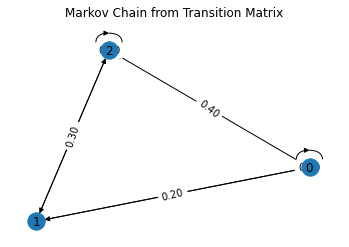

In [30]:
markov_chain(transition_matrix)